# Carribbean Population Statistics

In [1]:
# Just for convenience, remove Jupyter notebook warnings
import warnings
warnings.filterwarnings('ignore')

## Get the data

### Create dataframe

In [2]:
# import data analysis libraries
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

In [3]:
# read the data file in 
df = pd.read_excel('files/Antonio_Project_Dataset.xlsx')
df.head()

,Country Code Total,Country Name,Hult Region,Cool Name,AIDS estimated deaths (UNAIDS estimates),"Adjusted net enrollment rate, primary (% of primary school age children)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Antiretroviral therapy coverage (% of people living with HIV),Births attended by skilled health staff (% of total),CO2 emissions (metric tons per capita),...,Pregnant women receiving prenatal care (%),"Prevalence of HIV, total (% of population ages 15-49)",Prevalence of undernourishment (% of population),"Primary completion rate, total (% of relevant age group)",Proportion of seats held by women in national parliaments (%),Reported cases of malaria,"School enrollment, primary (% net)","Self-employed, total (% of total employment)",Trade (% of GDP),"Tuberculosis death rate (per 100,000 people), including HIV"
0,ABW,Aruba,Carribean Islands & Parts of Latin America,Ratchet,NaN,99.103333,32.7920,NaN,NaN,26.230847,...,NaN,NaN,NaN,95.133034,NaN,NaN,99.058319,NaN,141.187288,0.89
1,AFG,Afghanistan,Middle East & Russia,Mirage,NaN,NaN,111.1414,NaN,24.0,0.154101,...,36.0,NaN,24.6,NaN,27.7,81574.0,NaN,72.320000,73.065520,40.00
2,AGO,Angola,Sub-Saharan Africa,Sideswipe,9200.0,74.893661,178.1842,6.0,NaN,1.181527,...,NaN,1.6,23.7,39.270191,37.3,1377992.0,74.893661,71.968002,127.544974,69.00
3,ALB,Albania,Eastern Europe,Skids & Mudflap,100.0,87.151161,18.9116,14.0,NaN,1.484311,...,NaN,0.1,9.7,92.830223,7.1,NaN,87.151161,59.299999,77.451711,0.70
4,AND,Andorra,Eastern Europe,Skids & Mudflap,NaN,NaN,NaN,NaN,NaN,6.427887,...,NaN,NaN,NaN,NaN,25.0,NaN,NaN,NaN,NaN,NaN


### Split to Caribbean countries

In [4]:
carib = df[df['Hult Region'] == 'Carribean Islands & Parts of Latin America ']
carib.head()

,Country Code Total,Country Name,Hult Region,Cool Name,AIDS estimated deaths (UNAIDS estimates),"Adjusted net enrollment rate, primary (% of primary school age children)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Antiretroviral therapy coverage (% of people living with HIV),Births attended by skilled health staff (% of total),CO2 emissions (metric tons per capita),...,Pregnant women receiving prenatal care (%),"Prevalence of HIV, total (% of population ages 15-49)",Prevalence of undernourishment (% of population),"Primary completion rate, total (% of relevant age group)",Proportion of seats held by women in national parliaments (%),Reported cases of malaria,"School enrollment, primary (% net)","Self-employed, total (% of total employment)",Trade (% of GDP),"Tuberculosis death rate (per 100,000 people), including HIV"
0,ABW,Aruba,Carribean Islands & Parts of Latin America,Ratchet,NaN,99.103333,32.7920,NaN,NaN,26.230847,...,NaN,NaN,NaN,95.133034,NaN,NaN,99.058319,NaN,141.187288,0.89
9,ATG,Antigua and Barbuda,Carribean Islands & Parts of Latin America,Ratchet,NaN,84.916763,54.2470,NaN,100.0,5.194500,...,100.0,NaN,26.1,95.276970,10.5,NaN,84.096741,NaN,115.283599,NaN
20,BHS,"Bahamas, The",Carribean Islands & Parts of Latin America,Ratchet,NaN,98.607712,38.0850,29.0,99.0,4.290906,...,NaN,2.5,11.9,101.156769,12.2,14.0,98.242279,17.141001,87.429223,1.20
27,BRB,Barbados,Carribean Islands & Parts of Latin America,Ratchet,100.0,96.814499,47.6772,40.0,100.0,5.844583,...,NaN,1.1,5.1,94.600258,10.0,NaN,96.801208,17.066999,98.188744,0.37
44,CUB,Cuba,Carribean Islands & Parts of Latin America,Ratchet,500.0,97.613869,48.1398,30.0,99.9,2.691786,...,NaN,0.2,2.5,88.062134,43.2,NaN,96.877136,26.062000,44.917221,0.42


## Explore the DataFrame

Get all the column names and number of entries:
1. 45 columns with the country's statistics population, development, and illness statistics. 
2. 19 countries in Caribbean region

In [5]:
carib.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 0 to 207
Data columns (total 45 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Country Code Total                                                         19 non-null     object 
 1   Country Name                                                               19 non-null     object 
 2   Hult Region                                                                19 non-null     object 
 3   Cool Name                                                                  19 non-null     object 
 4   AIDS estimated deaths (UNAIDS estimates)                                   6 non-null      float64
 5   Adjusted net enrollment rate, primary (% of primary school age children)   10 non-null     float64
 6   Adolescent fertility rate (births per 1,000 women ages 15-1

Visualize the basic statistics:
1. Some missing data in each column `(count < 19)`
2. Some outliers `(Primary completion rate > 100%)`

In [6]:
carib.describe()

,AIDS estimated deaths (UNAIDS estimates),"Adjusted net enrollment rate, primary (% of primary school age children)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Antiretroviral therapy coverage (% of people living with HIV),Births attended by skilled health staff (% of total),CO2 emissions (metric tons per capita),"Contributing family workers, female (% of female employment)","Contributing family workers, male (% of male employment)","Contributing family workers, total (% of total employment)","Employment to population ratio, 15+, female (%) (modeled ILO estimate)",...,Pregnant women receiving prenatal care (%),"Prevalence of HIV, total (% of population ages 15-49)",Prevalence of undernourishment (% of population),"Primary completion rate, total (% of relevant age group)",Proportion of seats held by women in national parliaments (%),Reported cases of malaria,"School enrollment, primary (% net)","Self-employed, total (% of total employment)",Trade (% of GDP),"Tuberculosis death rate (per 100,000 people), including HIV"
count,6.00000,10.000000,14.000000,7.000000,10.000000,17.000000,11.000000,11.000000,11.000000,11.000000,...,4.000000,7.000000,12.000000,9.000000,13.000000,4.000000,10.000000,11.000000,14.000000,12.000000
mean,2450.00000,94.318180,51.949400,23.428571,99.590000,7.086937,1.668545,0.699455,1.105000,48.970272,...,99.625000,1.500000,16.025000,97.428181,15.992308,9662.500000,92.725282,32.742727,146.806675,1.805833
std,2677.87229,5.556891,18.522489,10.997835,0.587745,9.060986,1.676735,0.828919,1.116302,8.338961,...,0.478714,0.757188,14.019929,8.016062,10.125172,18094.729721,5.772130,21.159352,207.118881,2.389517
min,100.00000,84.916763,32.792000,11.000000,98.300000,0.247111,0.040000,0.072000,0.098000,33.028999,...,99.000000,0.200000,2.500000,88.062134,4.100000,14.000000,82.638573,12.073000,44.917221,0.370000
25%,500.00000,91.201691,42.099550,13.500000,99.275000,2.340362,0.443000,0.137000,0.315000,45.064501,...,99.375000,1.150000,6.825000,93.416740,10.500000,20.000000,89.966234,19.191501,81.743957,0.430000
50%,1250.00000,97.167698,47.908500,27.000000,99.950000,4.290906,1.387000,0.492000,0.888000,48.875999,...,99.750000,1.500000,11.150000,95.133034,13.300000,931.000000,94.511181,26.062000,94.543218,1.065000
75%,4700.00000,97.888624,53.039400,29.500000,100.000000,6.094875,2.080000,0.596500,1.131500,52.736000,...,100.000000,2.000000,21.675000,101.156769,18.800000,10573.500000,96.858154,37.299999,114.857051,1.750000
max,6000.00000,99.103333,107.085600,40.000000,100.000000,33.743586,5.575000,2.547000,3.385000,63.591000,...,100.000000,2.500000,52.500000,110.486542,43.200000,36774.000000,99.058319,88.014999,860.800000,9.000000


## Exploratory Data Analysis

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Data Cleanup

#### 1. Remove obvious outliers

In [8]:
def outlier(value):
    if value > 100.00:
        return 100.00
    else: 
        return value
carib['Primary completion rate, total (% of relevant age group)'] = carib['Primary completion rate, total (% of relevant age group)'].apply(outlier)
carib['Primary completion rate, total (% of relevant age group)']

0       95.133034
9       95.276970
20     100.000000
27      94.600258
44      88.062134
46            NaN
51      89.349113
53            NaN
76     100.000000
84            NaN
95            NaN
103           NaN
110           NaN
156           NaN
186           NaN
194     93.416740
204    100.000000
206           NaN
207           NaN
Name: Primary completion rate, total (% of relevant age group), dtype: float64

#### 2. Delete empty columns 

In [9]:
# All NaN for Caribbean countries
carib['Poverty gap at national poverty lines (%)'].unique()

array([nan])

In [10]:
# Delete this column 
del carib['Poverty gap at national poverty lines (%)']

In [11]:
# All NaN for Caribbean countries
carib['Literacy rate, adult total (% of people ages 15 and above)'].unique()

array([nan])

In [12]:
# Delete this column 
del carib['Literacy rate, adult total (% of people ages 15 and above)']

In [13]:
# All NaN except for one country
carib['Income share held by lowest 20%'].unique()

array([nan, 4.6])

In [14]:
# Delete this column
del carib['Income share held by lowest 20%']

#### 3. Populate empty values in non-empty columns

In [15]:
# Some NaN in this column
carib['Pregnant women receiving prenatal care (%)'].unique()

array([  nan, 100. ,  99. ,  99.5])

In [16]:
# Fill the NaN with the mean of the column values
carib['Pregnant women receiving prenatal care (%)'] = carib['Pregnant women receiving prenatal care (%)'].fillna(carib['Pregnant women receiving prenatal care (%)'].mean())

In [17]:
# some NaN in this column
carib['Primary completion rate, total (% of relevant age group)'].unique()

array([ 95.13303375,  95.27696991, 100.        ,  94.60025787,
        88.06213379,          nan,  89.34911346,  93.41674042])

In [18]:
# Fill the NaN with the mean of the column values
carib['Primary completion rate, total (% of relevant age group)'] = carib['Primary completion rate, total (% of relevant age group)'].fillna(carib['Primary completion rate, total (% of relevant age group)'].mean())

###  Visualize General Relationships in the Data

Observations:
1. Several columns are very highly correlated. 
2. Some of these same columns have the same correlation patterns with other columns as the others. 
2. We can cluster these columns together and create features. 

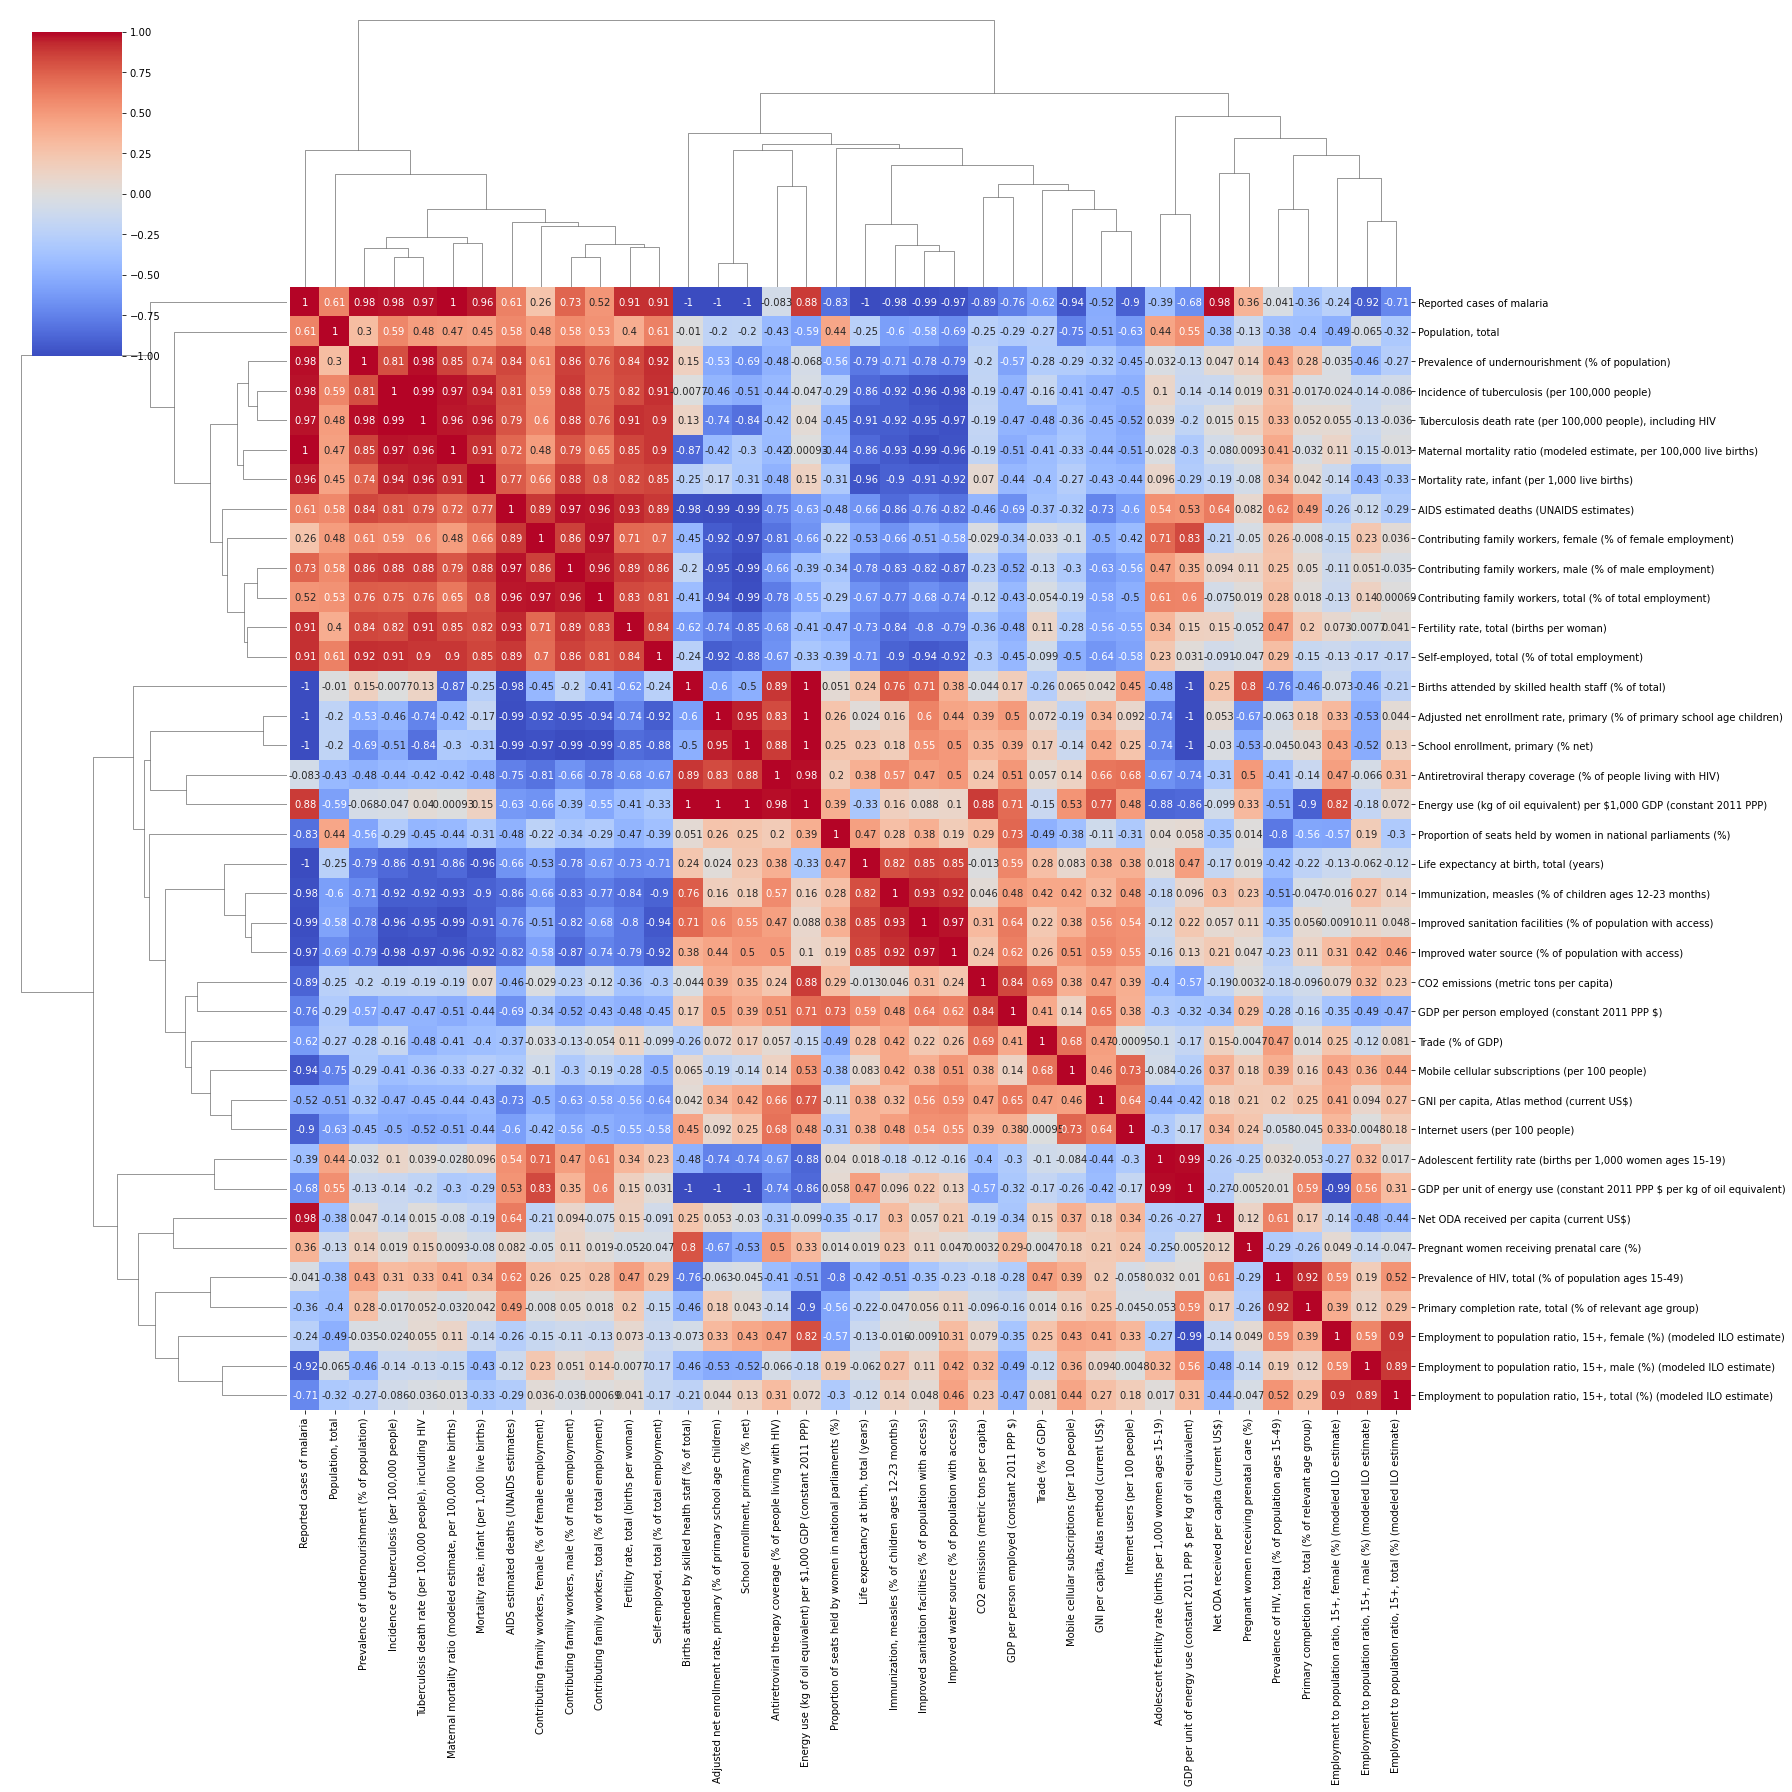

In [19]:
sns.clustermap(carib.corr(),annot=True,cmap='coolwarm',figsize=(25,25))

## Feature Engineering - Group Columns into comprehensive economic indicators

1. Country economic development
3. Proper Infrastructure
2. Population Demographics
4. Mortality/illness rates

### Normalize Features 

In [20]:
# Drop non-numerical columns 
numerical = carib.drop(['Country Code Total', 'Country Name', 'Hult Region', 'Cool Name'], axis=1)

# Normalize column values
from sklearn import preprocessing
x = numerical.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
numerical = pd.DataFrame(x_scaled,carib['Country Code Total'],carib.columns.drop(['Country Code Total', 'Country Name', 'Hult Region', 'Cool Name']))

numerical.head()

,AIDS estimated deaths (UNAIDS estimates),"Adjusted net enrollment rate, primary (% of primary school age children)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Antiretroviral therapy coverage (% of people living with HIV),Births attended by skilled health staff (% of total),CO2 emissions (metric tons per capita),"Contributing family workers, female (% of female employment)","Contributing family workers, male (% of male employment)","Contributing family workers, total (% of total employment)","Employment to population ratio, 15+, female (%) (modeled ILO estimate)",...,Pregnant women receiving prenatal care (%),"Prevalence of HIV, total (% of population ages 15-49)",Prevalence of undernourishment (% of population),"Primary completion rate, total (% of relevant age group)",Proportion of seats held by women in national parliaments (%),Reported cases of malaria,"School enrollment, primary (% net)","Self-employed, total (% of total employment)",Trade (% of GDP),"Tuberculosis death rate (per 100,000 people), including HIV"
Country Code Total,,,,,,,,,,,,,,,,,,,,,
ABW,NaN,1.000000,0.000000,NaN,NaN,0.775716,NaN,NaN,NaN,NaN,...,0.625,NaN,NaN,0.592309,NaN,NaN,1.000000,NaN,0.117995,0.060255
ATG,NaN,0.000000,0.288787,NaN,1.000000,0.147699,NaN,NaN,NaN,NaN,...,1.000,NaN,0.472,0.604366,0.163683,NaN,0.088806,NaN,0.086246,NaN
BHS,NaN,0.965064,0.071244,0.620690,0.411765,0.120723,0.041554,0.000000,0.020688,1.000000,...,0.625,1.000000,0.188,1.000000,0.207161,0.0,0.950301,0.066735,0.052106,0.096176
BRB,0.000000,0.838662,0.200356,1.000000,1.000000,0.167106,0.018790,0.018182,0.009735,0.832995,...,0.625,0.391304,0.052,0.547679,0.150895,NaN,0.862537,0.065761,0.065293,0.000000
CUB,0.067797,0.895009,0.206583,0.655172,0.941176,0.072983,0.000000,0.024646,0.000000,0.254008,...,0.625,0.000000,0.000,0.000000,1.000000,NaN,0.867161,0.184206,0.000000,0.005794


### Fill missing values

In [21]:
# Fill missing values in every column with the column mean
for column in numerical.columns:
    numerical[column] = numerical[column].fillna(numerical[column].mean())
    
numerical.head()

,AIDS estimated deaths (UNAIDS estimates),"Adjusted net enrollment rate, primary (% of primary school age children)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Antiretroviral therapy coverage (% of people living with HIV),Births attended by skilled health staff (% of total),CO2 emissions (metric tons per capita),"Contributing family workers, female (% of female employment)","Contributing family workers, male (% of male employment)","Contributing family workers, total (% of total employment)","Employment to population ratio, 15+, female (%) (modeled ILO estimate)",...,Pregnant women receiving prenatal care (%),"Prevalence of HIV, total (% of population ages 15-49)",Prevalence of undernourishment (% of population),"Primary completion rate, total (% of relevant age group)",Proportion of seats held by women in national parliaments (%),Reported cases of malaria,"School enrollment, primary (% net)","Self-employed, total (% of total employment)",Trade (% of GDP),"Tuberculosis death rate (per 100,000 people), including HIV"
Country Code Total,,,,,,,,,,,,,,,,,,,,,
ABW,0.398305,1.000000,0.000000,0.428571,0.758824,0.775716,0.294227,0.253517,0.306358,0.521604,...,0.625,0.565217,0.2705,0.592309,0.304151,0.262473,1.000000,0.272178,0.117995,0.060255
ATG,0.398305,0.000000,0.288787,0.428571,1.000000,0.147699,0.294227,0.253517,0.306358,0.521604,...,1.000,0.565217,0.4720,0.604366,0.163683,0.262473,0.088806,0.272178,0.086246,0.166377
BHS,0.398305,0.965064,0.071244,0.620690,0.411765,0.120723,0.041554,0.000000,0.020688,1.000000,...,0.625,1.000000,0.1880,1.000000,0.207161,0.000000,0.950301,0.066735,0.052106,0.096176
BRB,0.000000,0.838662,0.200356,1.000000,1.000000,0.167106,0.018790,0.018182,0.009735,0.832995,...,0.625,0.391304,0.0520,0.547679,0.150895,0.262473,0.862537,0.065761,0.065293,0.000000
CUB,0.067797,0.895009,0.206583,0.655172,0.941176,0.072983,0.000000,0.024646,0.000000,0.254008,...,0.625,0.000000,0.0000,0.000000,1.000000,0.262473,0.867161,0.184206,0.000000,0.005794


### Create Features

In [22]:
# Economic development indicator
numerical['economicDevelopment'] = (numerical['CO2 emissions (metric tons per capita)'] + numerical['GDP per person employed (constant 2011 PPP $)'] + numerical['Trade (% of GDP)'] + numerical['Mobile cellular subscriptions (per 100 people)'] + numerical['GNI per capita, Atlas method (current US$)'] \
    + numerical['Internet users (per 100 people)'] + numerical['Energy use (kg of oil equivalent) per $1,000 GDP (constant 2011 PPP)'] + numerical['GDP per unit of energy use (constant 2011 PPP $ per kg of oil equivalent)'] \
    + numerical['Net ODA received per capita (current US$)']) / 9

numerical.head()

,AIDS estimated deaths (UNAIDS estimates),"Adjusted net enrollment rate, primary (% of primary school age children)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Antiretroviral therapy coverage (% of people living with HIV),Births attended by skilled health staff (% of total),CO2 emissions (metric tons per capita),"Contributing family workers, female (% of female employment)","Contributing family workers, male (% of male employment)","Contributing family workers, total (% of total employment)","Employment to population ratio, 15+, female (%) (modeled ILO estimate)",...,"Prevalence of HIV, total (% of population ages 15-49)",Prevalence of undernourishment (% of population),"Primary completion rate, total (% of relevant age group)",Proportion of seats held by women in national parliaments (%),Reported cases of malaria,"School enrollment, primary (% net)","Self-employed, total (% of total employment)",Trade (% of GDP),"Tuberculosis death rate (per 100,000 people), including HIV",economicDevelopment
Country Code Total,,,,,,,,,,,,,,,,,,,,,
ABW,0.398305,1.000000,0.000000,0.428571,0.758824,0.775716,0.294227,0.253517,0.306358,0.521604,...,0.565217,0.2705,0.592309,0.304151,0.262473,1.000000,0.272178,0.117995,0.060255,0.457593
ATG,0.398305,0.000000,0.288787,0.428571,1.000000,0.147699,0.294227,0.253517,0.306358,0.521604,...,0.565217,0.4720,0.604366,0.163683,0.262473,0.088806,0.272178,0.086246,0.166377,0.377375
BHS,0.398305,0.965064,0.071244,0.620690,0.411765,0.120723,0.041554,0.000000,0.020688,1.000000,...,1.000000,0.1880,1.000000,0.207161,0.000000,0.950301,0.066735,0.052106,0.096176,0.392879
BRB,0.000000,0.838662,0.200356,1.000000,1.000000,0.167106,0.018790,0.018182,0.009735,0.832995,...,0.391304,0.0520,0.547679,0.150895,0.262473,0.862537,0.065761,0.065293,0.000000,0.391634
CUB,0.067797,0.895009,0.206583,0.655172,0.941176,0.072983,0.000000,0.024646,0.000000,0.254008,...,0.000000,0.0000,0.000000,1.000000,0.262473,0.867161,0.184206,0.000000,0.005794,0.171724


In [23]:
# Population poverty indicator 
numerical['demographicPoverty'] = (numerical['Population, total'] \
    + numerical['Prevalence of undernourishment (% of population)']   \
    + numerical['Contributing family workers, female (% of female employment)'] \
    + numerical['Contributing family workers, male (% of male employment)'] \
    + numerical['Contributing family workers, total (% of total employment)'] \
    + numerical['Fertility rate, total (births per woman)'] \
    + numerical['Self-employed, total (% of total employment)'] \
    + numerical['Adolescent fertility rate (births per 1,000 women ages 15-19)']) / 8

numerical.head()

,AIDS estimated deaths (UNAIDS estimates),"Adjusted net enrollment rate, primary (% of primary school age children)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Antiretroviral therapy coverage (% of people living with HIV),Births attended by skilled health staff (% of total),CO2 emissions (metric tons per capita),"Contributing family workers, female (% of female employment)","Contributing family workers, male (% of male employment)","Contributing family workers, total (% of total employment)","Employment to population ratio, 15+, female (%) (modeled ILO estimate)",...,Prevalence of undernourishment (% of population),"Primary completion rate, total (% of relevant age group)",Proportion of seats held by women in national parliaments (%),Reported cases of malaria,"School enrollment, primary (% net)","Self-employed, total (% of total employment)",Trade (% of GDP),"Tuberculosis death rate (per 100,000 people), including HIV",economicDevelopment,demographicPoverty
Country Code Total,,,,,,,,,,,,,,,,,,,,,
ABW,0.398305,1.000000,0.000000,0.428571,0.758824,0.775716,0.294227,0.253517,0.306358,0.521604,...,0.2705,0.592309,0.304151,0.262473,1.000000,0.272178,0.117995,0.060255,0.457593,0.187813
ATG,0.398305,0.000000,0.288787,0.428571,1.000000,0.147699,0.294227,0.253517,0.306358,0.521604,...,0.4720,0.604366,0.163683,0.262473,0.088806,0.272178,0.086246,0.166377,0.377375,0.275056
BHS,0.398305,0.965064,0.071244,0.620690,0.411765,0.120723,0.041554,0.000000,0.020688,1.000000,...,0.1880,1.000000,0.207161,0.000000,0.950301,0.066735,0.052106,0.096176,0.392879,0.071974
BRB,0.000000,0.838662,0.200356,1.000000,1.000000,0.167106,0.018790,0.018182,0.009735,0.832995,...,0.0520,0.547679,0.150895,0.262473,0.862537,0.065761,0.065293,0.000000,0.391634,0.061289
CUB,0.067797,0.895009,0.206583,0.655172,0.941176,0.072983,0.000000,0.024646,0.000000,0.254008,...,0.0000,0.000000,1.000000,0.262473,0.867161,0.184206,0.000000,0.005794,0.171724,0.178363


In [24]:
# Health and education infrastructure indicator
numerical['properInfrastructure'] = (numerical['Immunization, measles (% of children ages 12-23 months)'] \
    + numerical['Improved sanitation facilities (% of population with access)'] \
    + numerical['Improved water source (% of population with access)'] \
    + numerical['Adjusted net enrollment rate, primary (% of primary school age children)'] \
    + numerical['School enrollment, primary (% net)'] \
    + numerical['Antiretroviral therapy coverage (% of people living with HIV)'] \
    + numerical['Pregnant women receiving prenatal care (%)']) / 7

numerical.head()

,AIDS estimated deaths (UNAIDS estimates),"Adjusted net enrollment rate, primary (% of primary school age children)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Antiretroviral therapy coverage (% of people living with HIV),Births attended by skilled health staff (% of total),CO2 emissions (metric tons per capita),"Contributing family workers, female (% of female employment)","Contributing family workers, male (% of male employment)","Contributing family workers, total (% of total employment)","Employment to population ratio, 15+, female (%) (modeled ILO estimate)",...,"Primary completion rate, total (% of relevant age group)",Proportion of seats held by women in national parliaments (%),Reported cases of malaria,"School enrollment, primary (% net)","Self-employed, total (% of total employment)",Trade (% of GDP),"Tuberculosis death rate (per 100,000 people), including HIV",economicDevelopment,demographicPoverty,properInfrastructure
Country Code Total,,,,,,,,,,,,,,,,,,,,,
ABW,0.398305,1.000000,0.000000,0.428571,0.758824,0.775716,0.294227,0.253517,0.306358,0.521604,...,0.592309,0.304151,0.262473,1.000000,0.272178,0.117995,0.060255,0.457593,0.187813,0.824669
ATG,0.398305,0.000000,0.288787,0.428571,1.000000,0.147699,0.294227,0.253517,0.306358,0.521604,...,0.604366,0.163683,0.262473,0.088806,0.272178,0.086246,0.166377,0.377375,0.275056,0.622648
BHS,0.398305,0.965064,0.071244,0.620690,0.411765,0.120723,0.041554,0.000000,0.020688,1.000000,...,1.000000,0.207161,0.000000,0.950301,0.066735,0.052106,0.096176,0.392879,0.071974,0.821392
BRB,0.000000,0.838662,0.200356,1.000000,1.000000,0.167106,0.018790,0.018182,0.009735,0.832995,...,0.547679,0.150895,0.262473,0.862537,0.065761,0.065293,0.000000,0.391634,0.061289,0.866493
CUB,0.067797,0.895009,0.206583,0.655172,0.941176,0.072983,0.000000,0.024646,0.000000,0.254008,...,0.000000,1.000000,0.262473,0.867161,0.184206,0.000000,0.005794,0.171724,0.178363,0.817479


In [25]:
# Illness and death rate indicator
numerical['illnessDeathRates'] = (numerical['Reported cases of malaria'] \
    + numerical['Incidence of tuberculosis (per 100,000 people)'] \
    + numerical['Mortality rate, infant (per 1,000 live births)'] \
    + numerical['AIDS estimated deaths (UNAIDS estimates)'] \
    + numerical['Tuberculosis death rate (per 100,000 people), including HIV'] \
    + numerical['Maternal mortality ratio (modeled estimate, per 100,000 live births)']) / 6

numerical.head()

,AIDS estimated deaths (UNAIDS estimates),"Adjusted net enrollment rate, primary (% of primary school age children)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Antiretroviral therapy coverage (% of people living with HIV),Births attended by skilled health staff (% of total),CO2 emissions (metric tons per capita),"Contributing family workers, female (% of female employment)","Contributing family workers, male (% of male employment)","Contributing family workers, total (% of total employment)","Employment to population ratio, 15+, female (%) (modeled ILO estimate)",...,Proportion of seats held by women in national parliaments (%),Reported cases of malaria,"School enrollment, primary (% net)","Self-employed, total (% of total employment)",Trade (% of GDP),"Tuberculosis death rate (per 100,000 people), including HIV",economicDevelopment,demographicPoverty,properInfrastructure,illnessDeathRates
Country Code Total,,,,,,,,,,,,,,,,,,,,,
ABW,0.398305,1.000000,0.000000,0.428571,0.758824,0.775716,0.294227,0.253517,0.306358,0.521604,...,0.304151,0.262473,1.000000,0.272178,0.117995,0.060255,0.457593,0.187813,0.824669,0.197922
ATG,0.398305,0.000000,0.288787,0.428571,1.000000,0.147699,0.294227,0.253517,0.306358,0.521604,...,0.163683,0.262473,0.088806,0.272178,0.086246,0.166377,0.377375,0.275056,0.622648,0.178012
BHS,0.398305,0.965064,0.071244,0.620690,0.411765,0.120723,0.041554,0.000000,0.020688,1.000000,...,0.207161,0.000000,0.950301,0.066735,0.052106,0.096176,0.392879,0.071974,0.821392,0.135867
BRB,0.000000,0.838662,0.200356,1.000000,1.000000,0.167106,0.018790,0.018182,0.009735,0.832995,...,0.150895,0.262473,0.862537,0.065761,0.065293,0.000000,0.391634,0.061289,0.866493,0.077078
CUB,0.067797,0.895009,0.206583,0.655172,0.941176,0.072983,0.000000,0.024646,0.000000,0.254008,...,1.000000,0.262473,0.867161,0.184206,0.000000,0.005794,0.171724,0.178363,0.817479,0.071043


### Overarching Hypothesis: 
##### Low economic development --> Poor Health & Education Infrastructure --> High Demographic poverty --> High Illness/Mortality 

#### Observation 1 - Poorly developed countries have worse health & education infrastructure 

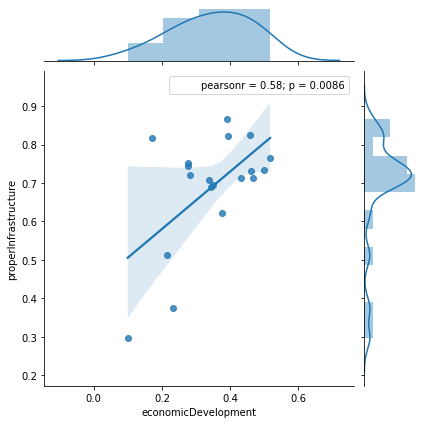

In [26]:
sns.jointplot('economicDevelopment','properInfrastructure',data=numerical,kind='reg',stat_func=pearsonr)

#### Observation 2 - Countries with worse health infrastructure have worse demographic poverty levels

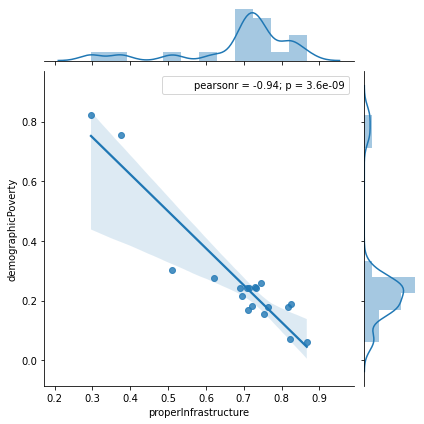

In [27]:
sns.jointplot('properInfrastructure', 'demographicPoverty', data=numerical,kind='reg',stat_func=pearsonr)

#### Observation 3 - Countries with higher demographic poverty levels have higher onset of disease and death rates

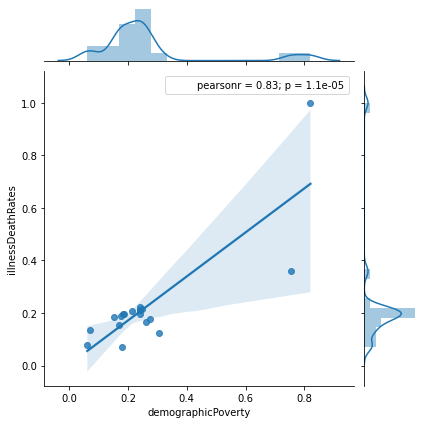

In [28]:
sns.jointplot('demographicPoverty','illnessDeathRates',data=numerical,kind='reg',stat_func=pearsonr)

### Conclusion: 

Countries need to focus on economic, infrastructure, and social development in order to reduce illness and mortality rates, thereby enabling their population to live long healthy lives. 

Caveat: In reality, all these features are intertwined and it is not easy for governments to decide where to start when putting in place effective strategies for growth. 